## Dessin bubble tea en matplotlib

In [6]:
import numpy as np
import math as ma
import matplotlib.pyplot as plt
from numpy.linalg import solve # pour travailler des matrix

Fontion général pour dessinner
- Pour dessiner des parabols de n points: $f(x) = a_0x^0 + a_1x^1 + a_2x^2 + ... a_nx^n$
- Pour dessiner des lignes => utiliser la fonstion en-dessus avec 2 points

In [7]:
LIGHT_BROWN = "#f4cfb2"
LIGHT_BLUE = "#e2efff"
BROWN = "#c76b3a"
MOYEN_BROWN = "#d39063"
BLACK = "#1d232b"
PINK = "#faa0ba"
WHITE = "#ffffff"
ORANGE = "#ffc198"

In [8]:
def drawParabol(x, S, N): return sum(S[t]*(x**t) for t in range(N))
def createListX(X, N): return [1*[X[d]**t for t in range(N)] for d in range(N)]
def createListY(Y, N): return [Y[t] for t in range(N)]

In [9]:
def drawMultiplePoint(points,showPoint=True, showBorder=True, color=LIGHT_BROWN, border=BLACK):
    # Créer des points pour dessinner
    X = [t[0] for t in points]
    Y = [t[1] for t in points]
    N = len(X)
    if showPoint: plt.plot(X,Y, "*r")

    # Créer des listes pour calculer matrix
    A = np.array(createListX(X,N))
    b = np.array(createListY(Y,N))
    S = solve(A,b)
   
    # Position de X pour dessiner avec nombre de points
    Vx = np.linspace(min(X),max(X), 100)
   
    # Position de Y pour dessiner par la définition drawParabol
    Vy = [drawParabol(t,S,N) for t in Vx]
    if showBorder: plt.plot(Vx,Vy,border,linewidth=1)
    plt.fill(Vx, Vy, color)

In [10]:
def drawCircle(pos,showBorder=True,start = 0, end = 2*np.pi,R1 = 0.5,R2=0.5, color=BROWN, border=BLACK):
    T = np.linspace(start,end,100)
    Vx=R1*np.cos(T)+pos[0]
    Vy=R2*np.sin(T)+pos[1]
    if showBorder: plt.plot(Vx,Vy,border,linewidth=1)
    plt.fill(Vx,Vy,color)

In [11]:
def drawBordCup(pointLine,showPoint=True, showBorder=True): 
    if len(pointLine) <= 2:
        # Distance 2 lines = 1
        pointX1 = pointLine[0][0]
        pointX2 = pointLine[1][0]
        pointY1 = pointLine[0][1]
        pointY2 = pointLine[0][1]+1
        moyenY = (pointLine[0][1]+pointY2)/2
        pointLine2 = [(pointX1, pointY2), (pointX2,pointY2)]
        
        # dessiner
        drawMultiplePoint(pointLine,showPoint, showBorder)
        drawMultiplePoint(pointLine2,showPoint, showBorder)
        drawCircle((pointX1,moyenY),showBorder, np.pi/2, 3*np.pi/2 ,color=ORANGE)
        drawCircle((pointX2,moyenY),showBorder, np.pi/2, (-1)*np.pi/2 ,color=ORANGE)
        # pixel problem => + 0.1
        plt.fill([pointX1-0.1,pointX2+0.1,pointX2+0.1,pointX1-0.1],[pointY1,pointY1,pointY2,pointY2],ORANGE)

In [12]:
def drawStraw(pointLine,showPoint=True, showBorder=True):
    if len(pointLine) <= 2:
        # Distance 2 lines = 1
        pointX1 = pointLine[0][0]+1
        pointX2 = pointLine[1][0]+1
        pointY1 = pointLine[0][1]
        pointY2 = pointLine[1][1]
        moyenX = (pointX1+pointX2)/2
        pointLine2 = [(pointX1, pointY1), (pointX2,pointY2)]
        
        # dessiner
        drawMultiplePoint(pointLine,showPoint, showBorder)
        drawMultiplePoint(pointLine2,showPoint, showBorder)
        drawCircle((moyenX,pointY2),showBorder, 0, 2*np.pi,0.5,0.2,PINK)
        plt.fill([pointX1-1,pointX2-1,pointX2,pointX1],[pointY1,pointY2,pointY2,pointY1],PINK)

In [16]:
def drawEye(points):
    if len(points) <= 3:
        x0 = points[0][0]
        y0 = points[0][1]
        x1 = points[1][0]
        y1 = points[1][1]
        x2 = points[2][0]
        y2 = points[2][1]
        A = np.array([[x0,1,0,0],[x2,1,0,0],[0,0,x1,1],[x2,1,-x2,-1]])
        b = np.array([y0,y2,y1,0])
        S = solve(A, b)
        Va = np.linspace(x0, x2, 100)
        Vb = np.linspace(x1, x2, 100)
        def A(x): return S[0]*x+S[1]
        def B(x): return S[2]*x+S[3]
        #plt.plot(X, Y, "+r")
        plt.plot(Va, A(Va), "-b")
        plt.plot(Vb, B(Vb), "-g")
        plt.axis('equal')

In [17]:
def showBubbleTea(pointU,pointLineBordCup,pointLineStraw,pointEyeL,pointEyeR,showPoint=True,showBorder=True):
    # dessiner U
    drawMultiplePoint(pointU,showPoint,showBorder)
    
    # dessiner des yeux
    drawEye(pointEyeL)
    drawEye(pointEyeR)

    # dessiner bord de tasse
    drawBordCup(pointLineBordCup,showPoint,showBorder)

    # dessiner la tete de bubble tea
    drawCircle((6,11),showBorder,0, np.pi,4,3,MOYEN_BROWN)

    # dessiner tapioca
    posTapioca = [(5,5.5),(7,5.5),(4,4),(6,4),(8,4),(5,2.5),(7,2.5)]
    [drawCircle(p,showBorder) for p in posTapioca]

    # dessiner la paille
    drawStraw(pointLineStraw,showPoint, showBorder)

    # Faire le dessin dans le bon position
    plt.axis('equal')

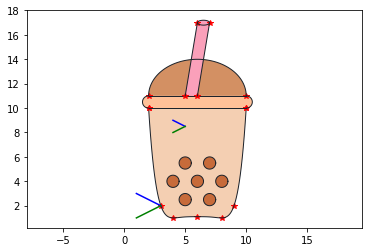

In [18]:
pointU = [(2,10),(3,2),(4,1),(6,1.1),(8,1),(9,2),(10,10)]
pointLineBordCup = [(2, 10), (10,10)]
pointLineStraw = [(5, 11), (6,17)]
pointEyeL = [(4,9),(4,8),(5,8.5)]
pointEyeR = [(1,3),(1,1),(3,2)]

showBubbleTea(pointU,pointLineBordCup,pointLineStraw,pointEyeL,pointEyeR)



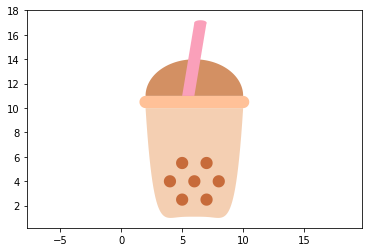

In [13]:
showBubbleTea(pointU,pointLineBordCup,pointLineStraw,False,False)